In [1]:
import scipy.cluster.hierarchy as hca
import pandas as pd
import numpy as np
from pylab import *
from matplotlib import pyplot
%matplotlib inline
np.set_printoptions(suppress=True)
data=pd.read_csv("/dsa/data/DSA-8630/mini_project/pantheon-project/database.csv")
data.head()


,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
0,308,Aristotle,Male,-384,Stageira,NaN,Greece,Europe,40.33333,23.50000,Philosopher,Philosophy,Humanities,152,56355172,370758,31.9938
1,22954,Plato,Male,-427,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,142,46812003,329662,31.9888
2,1095706,Jesus Christ,Male,-4,Judea,NaN,Israel,Asia,32.50000,34.90000,Religious Figure,Religion,Institutions,214,60299092,281771,31.8981
3,25664190,Socrates,Male,-469,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,137,40307143,294213,31.6521
4,783,Alexander the Great,Male,-356,Pella,NaN,Greece,Europe,40.80000,22.51667,Military Personnel,Military,Institutions,138,48358148,350421,31.584


In [2]:
data.isnull().any()

article_id                     False
full_name                      False
sex                            False
birth_year                     False
city                           False
state                           True
country                         True
continent                       True
latitude                        True
longitude                       True
occupation                     False
industry                       False
domain                         False
article_languages              False
page_views                     False
average_views                  False
historical_popularity_index    False
dtype: bool

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
for col in data:
    print (col, data[col].dtypes)

article_id int64
full_name object
sex object
birth_year object
city object
state object
country object
continent object
latitude float64
longitude float64
occupation object
industry object
domain object
article_languages object
page_views object
average_views object
historical_popularity_index object


In [5]:
#Create a set of dummy variables for the continent column in data.
data_continent=pd.get_dummies(data['continent'])
#join the new dataframe continent to data.
data1=pd.concat([data,data_continent],axis=1)
data1.head()

,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,...,page_views,average_views,historical_popularity_index,Africa,Asia,Europe,North America,Oceania,South America,Unknown
0,308,Aristotle,Male,-384,Stageira,NaN,Greece,Europe,40.33333,23.50000,...,56355172,370758,31.9938,0,0,1,0,0,0,0
1,22954,Plato,Male,-427,Athens,NaN,Greece,Europe,37.96667,23.71667,...,46812003,329662,31.9888,0,0,1,0,0,0,0
2,1095706,Jesus Christ,Male,-4,Judea,NaN,Israel,Asia,32.50000,34.90000,...,60299092,281771,31.8981,0,1,0,0,0,0,0
3,25664190,Socrates,Male,-469,Athens,NaN,Greece,Europe,37.96667,23.71667,...,40307143,294213,31.6521,0,0,1,0,0,0,0
4,783,Alexander the Great,Male,-356,Pella,NaN,Greece,Europe,40.80000,22.51667,...,48358148,350421,31.584,0,0,1,0,0,0,0


In [7]:
num_data=data1.iloc[:,13:24]
num_data= num_data.convert_objects(convert_numeric=True)
num_data.head()

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


,article_languages,page_views,average_views,historical_popularity_index,Africa,Asia,Europe,North America,Oceania,South America,Unknown
0,152.0,56355172.0,370758.0,31.9938,0,0,1,0,0,0,0
1,142.0,46812003.0,329662.0,31.9888,0,0,1,0,0,0,0
2,214.0,60299092.0,281771.0,31.8981,0,1,0,0,0,0,0
3,137.0,40307143.0,294213.0,31.6521,0,0,1,0,0,0,0
4,138.0,48358148.0,350421.0,31.5840,0,0,1,0,0,0,0


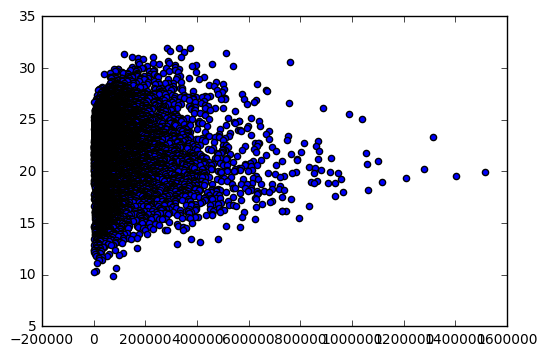

In [8]:
plt.scatter(num_data.iloc[:,2], num_data.iloc[:,3])
plt.show()

In [9]:
for col in num_data:
    print (col, num_data[col].dtypes)

article_languages float64
page_views float64
average_views float64
historical_popularity_index float64
Africa uint8
Asia uint8
Europe uint8
North America uint8
Oceania uint8
South America uint8
Unknown uint8


In [10]:
rows1 = pd.Series(data1.loc[data1['article_languages'] == "Not Provided"].index)
invalid_data1 = data1.loc[(rows1),]
#print(invalid_data1)
rows2 = pd.Series(data1.loc[data1['page_views'] == "Not Provided"].index)
invalid_data2 = data1.loc[(rows2),]
# print(invalid_data2)
rows3 = pd.Series(data1.loc[data1['average_views'] == "Not Provided"].index)
invalid_data3 =data1.loc[(rows3),]
# print(invalid_data3)
rows4 = pd.Series(data1.loc[data1['historical_popularity_index'] == "Not Provided"].index)
invalid_data4 = data1.loc[(rows4),]

invalid_data1 = invalid_data1.append(invalid_data2)
invalid_data1 = invalid_data1.append(invalid_data3)
invalid_data1 = invalid_data1.append(invalid_data4)

invalid_data1.drop_duplicates()

,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,...,page_views,average_views,historical_popularity_index,Africa,Asia,Europe,North America,Oceania,South America,Unknown
10262,3543763,Ginnifer Goodwin,Female,1978,Memphis,TN,United States,North America,35.11737,-89.97107,...,7130053,274233,16.9662,0,0,0,1,0,0,0
10579,22299320,Bérénice Bejo,Female,1976,Buenos Aires,NaN,Argentina,South America,-34.60333,-58.38167,...,2846258,94875,16.1673,0,0,0,0,0,1,0
10665,5285260,Diego Benaglio,Male,1983,Zürich,NaN,Switzerland,Europe,47.36667,8.55000,...,Not Provided,25973,15.9405,0,0,1,0,0,0,0
11323,3041968,Infanta Leonor of Spain,Female,2005,Madrid,NaN,Spain,Europe,40.40000,-3.68333,...,Not Provided,Not Provided,Not Provided,0,0,1,0,0,0,0
11335,32941975,Jetro Willems,Male,1994,Rotterdam,NaN,Netherlands,Europe,51.91667,4.50000,...,Not Provided,21404,11.3956,0,0,1,0,0,0,0
11216,17368230,Zlatan Ljubijankič,Male,1983,Ljubljana,NaN,Slovenia,Europe,46.05556,14.50833,...,229486,8826,Not Provided,0,0,1,0,0,0,0
11321,937355,Leisel Jones,Female,1985,Katherine,NaN,Australia,Oceania,-14.46667,132.26667,...,463947,17844,Not Provided,0,0,0,0,1,0,0


In [13]:
data1=data1.drop(data1.index[[11321,11216,11335,11323,10665,10579,10262]])

In [17]:
num_data=num_data.drop(num_data.index[[11312,11216,11335,11323,10665,10579,10262]])

In [16]:
# generate the linkage matrix
z = hca.linkage(data1.iloc[:,13:24],'ward')

In [20]:
num_data.isnull().sum()

article_languages              0
page_views                     0
average_views                  0
historical_popularity_index    1
Africa                         0
Asia                           0
Europe                         0
North America                  0
Oceania                        0
South America                  0
Unknown                        0
dtype: int64

In [21]:
num_data['historical_popularity_index'] = num_data['historical_popularity_index'].fillna((num_data['historical_popularity_index'].mean()))



In [22]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, cop_dist = cophenet(z, pdist(num_data))
c

0.65461174114044929

In [23]:
z[0]

array([ 4482.        ,  8213.        ,     3.32001352,     2.        ])

In [26]:
num_data.loc[[4482, 8213], :]

,article_languages,page_views,average_views,historical_popularity_index,Africa,Asia,Europe,North America,Oceania,South America,Unknown
4482,27.0,195039.0,7224.0,23.6915,0,0,0,0,0,0,1
8213,27.0,195040.0,7224.0,20.8591,0,0,0,1,0,0,0


The numbers are identical for articles_languages and average_views and
page views and historical_popularity index are prety close.It does not seem to cluster based on location.
It looks like it relies more on the numbers in the columns.But my overall cophenetic correlation coefficent is 
just above 50 percent which is not a very good number.

In [24]:
y=hca.linkage(num_data,metric="euclidean",method="ward")

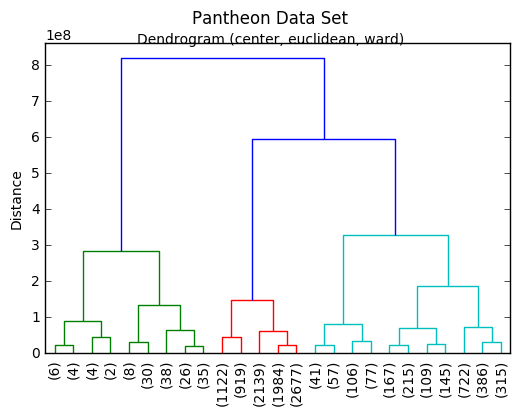

In [25]:
plt=hca.dendrogram(y,truncate_mode="lastp",p=25)
xticks(rotation=90)
ylabel("Distance")
figtext(0.5,0.95,"Pantheon Data Set",ha="center",fontsize=12)
figtext(0.5,0.90,"Dendrogram (center, euclidean, ward)",ha="center",fontsize=10)

In [28]:
from scipy.cluster.hierarchy import fcluster
max_d = 4
clusters = fcluster(z, max_d, criterion='distance')
clusters

array([  42,   71,   30, ..., 5743, 4956, 4062], dtype=int32)

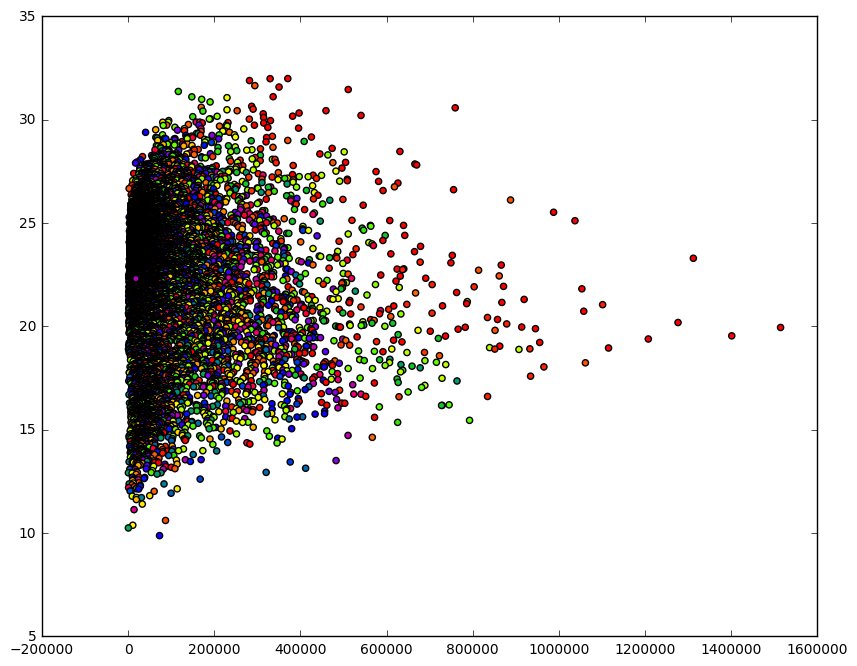

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.scatter(num_data.iloc[:,2], num_data.iloc[:,3], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

Looking at this visualization it is no wonder why cophenetic correlation  coefficient is 65.46%

In [40]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
data=num_data[['average_views','historical_popularity_index']]
data=data.as_matrix().astype('float32',copy=False)

In [41]:
stscaler = StandardScaler().fit(data)
data = stscaler.transform(data)

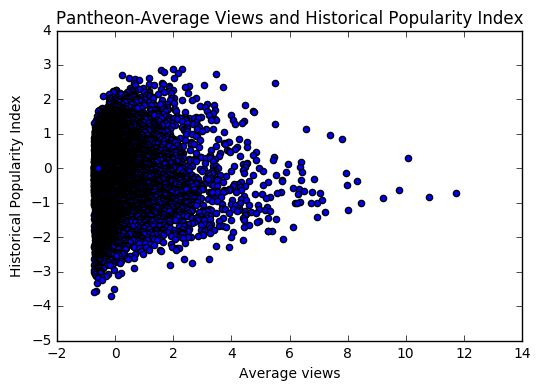

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(data[:,0], data[:,1])
plt.xlabel("Average views")
plt.ylabel("Historical Popularity Index")
plt.title("Pantheon-Average Views and Historical Popularity Index")

In [44]:
dbscan = DBSCAN(eps = .5, min_samples = 1500).fit(data)

In [45]:
import numpy as np

labels = dbscan.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbscan.core_sample_indices_] = True

In [46]:
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))

/usr/lib64/python3.4/site-packages/matplotlib/lines.py:1145: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


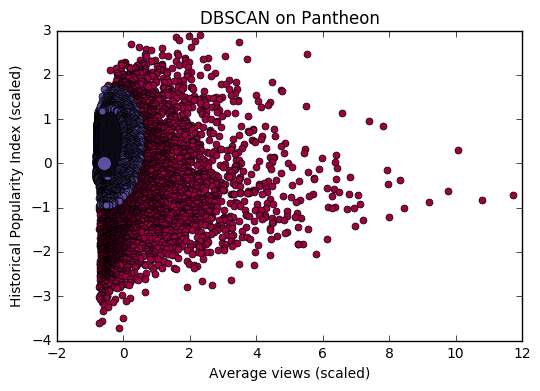

In [47]:
for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = data[class_member_mask & core_samples]
    plt.plot(xy[:,0],xy[:,1], 'o', markerfacecolor = color, markersize = 10)
    
    xy2 = data[class_member_mask & ~core_samples]
    plt.plot(xy2[:,0],xy2[:,1], 'o', markerfacecolor = color, markersize = 5)
    
plt.title("DBSCAN on Pantheon")
plt.xlabel("Average views (scaled)")
plt.ylabel("Historical Popularity Index (scaled)")

the points with large average views figures tend to be classified as outliers.